##### Loading Header Files

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import torch.onnx

%matplotlib inline

### Function to Create a List to store all the Filenames
### under each folder

In [3]:
def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)

###### Printing number of files under each folder

In [5]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    #path = r'9444_WeightDancers_projarchive//'+ sess_name + '//'
    path = r"C:/Users/User/9444_WeightDancers_proj/archive/" + sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [6]:
len(list_files)###total number of files in the directory

1440

##### Creating the Dataset

Here during assigning of emotion classes, like '01' for 'neutral', we assigned '0' for neutral; that means for each class number, we subtracted 1 from it, because convolution neural networks start classifying classes labelled from '0'.Therefore our 7 classes are '0','1','2','3','4','5','6','7'

In [7]:
emotion_class = []
for everyfile in list_files:
  if (everyfile.split('/')[-1].strip('.wav')):
    ##getting the actual audio file name
    filename = everyfile.split('/')[-1].strip('.wav')

    audio_file = filename.split('-')

    ##getting the emotion class
    label = audio_file[2]

    ##making the class labels as either '0', '1', '2', '3', '4', '5', '6', '7'
    number_label = int(label) - 1

    emotion_class.append(number_label)

##### Printing the Class Labels

In [8]:
emotion_class###printing of the 'emotion_class' labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [9]:
data = []

for filenames, labels in zip(list_files, emotion_class):
  data.append({"path": filenames, "emotion_id": labels})

In [10]:
import pandas as pd

final_dataframe = pd.DataFrame(data)

###### Creation of Final Dataframe

In [11]:
final_dataframe

,path,emotion_id
0,C:/Users/User/9444_WeightDancers_proj/archive/...,0
1,C:/Users/User/9444_WeightDancers_proj/archive/...,0
2,C:/Users/User/9444_WeightDancers_proj/archive/...,0
3,C:/Users/User/9444_WeightDancers_proj/archive/...,0
4,C:/Users/User/9444_WeightDancers_proj/archive/...,1
...,...,...
1435,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1436,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1437,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1438,C:/Users/User/9444_WeightDancers_proj/archive/...,7


In [12]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

Preprocessing of Audio File Starts. Preprocessing code has been copied from https://ketanhdoshi.github.io/Audio-Classification/
Preprocessing Steps:-
(1)First, we converted all the audio files to have the same Sample Rates, in our case, we converted each audio signal to have a sample rate of 44100 KHz.

(2) In the second step of preprocessing, we have audio samples (some have no. of channels = 1 or no. of channels =2), so we need to convert all the audio samples to ensure that all the samples have 2 channels. If the channel is mono, we duplicated another signal and concatenated it to construct a bi-channel.

(3) Resizing the signals to the same time length, we set a uniform length (here the length of signals is measured in ‘ms (milliseconds)’ i.e. we want signals to have the same time length of 4,000 ms. If the length of the signal is > 4000ms, we truncated; else if the signal is short we padded the time length with 0's.

(4)Preprocessing Step 5:Giving a time shift = 0.4secs; to each of the audio files for data augmentation purpose

(5)‘tranfroms.melsprctrogram’ method has been used to extract mel-spectrogram from a signal.The number of mel-spectrogram bands were configured to 64 and the window length for sampling each signal was set 1024.

In [13]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  
   #### Preprocessing Step 1: Function that returns the signal along with the Sample Rate
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)



  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  ###Preprocessing Step 2: Converting the sudio files so that they have same number of channels
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  ##same sample rates for each audio signal
  ### Preprocessing Step 3: Converting the audio files to have same number of samples
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  ##resizing signals to the same length
  ##Preprocessing Step 4: Converting all the audio files to the Same time length
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

  ###performing data augmentation by time shifting of audio signals
  ###Preprocessing Step 5:Giving a time shift to each of the audio files for data augmentation purpose
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  ##Precprocessing Step 6: Extracting melspectrogram feature from an audio signal
  def spectro_gram(aud, n_mels=64, n_fft=40, hop_len=20):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [14]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

Driver Functions For Preprocessing

In [15]:
# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)

  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.df.loc[idx, 'path']
    # Get the Class ID/ Emotion ID
    class_id = self.df.loc[idx, 'emotion_id']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    

    return sgram, class_id

In [16]:
from torch.utils.data import random_split


###Preprocessing Function has been called
### basically, 'myds' is object of Class SoundDS
### which consists of preprocessing methods defined under
### the class SoundDS

myds = SoundDS(final_dataframe, list_files)

In [17]:
len(myds)

1440

Getting the Training and Validation Dataset

In [18]:
num_items = len(myds)

##Number of items in the Training Dataset
num_train = round(num_items * 0.8)

##Number of items in the Validation Dataset
num_val = num_items - num_train

##randomly splitting the data between training and valaidation dataset
train_ds, val_ds = random_split(myds, [num_train, num_val])

Here, in our Case Alexnet's each convolution block rachitecture consists of large number of channels, therefore in order to efficiently train on local GPU, batch size for both training and validation dataset is set to 8

In [19]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=8, shuffle=False)

In [20]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

Taking the MultiHead Attention from https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html

What are 'Q', 'K' and 'V' matrices?

Query: The query is a feature vector that describes what we are looking for in the sequence of an audio signal, i.e. what would we maybe want to pay attention to.

Keys: For each input signal, we have a key which is again a feature vector. This feature vector roughly describes what the element is “offering”, or when it might be important. The keys should be designed such that we can identify the elements we want to pay attention to based on the query.

Values: For each input element, we also have a value vector. This feature vector is the one we want to average over.

#### Function to Perform Scaled Dot Product between 'Q','K' and 'V' matrices

In [21]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [22]:
# Helper function to support different mask shapes.
# Output shape supports (batch_size, number of heads, seq length, seq length)
# If 2D: broadcasted over batch size and number of heads
# If 3D: broadcasted over number of heads
# If 4D: leave as is
def expand_mask(mask):
    assert mask.ndim > 2, "Mask must be at least 2-dimensional with seq_length x seq_length"
    if mask.ndim == 3:
        mask = mask.unsqueeze(1)
    while mask.ndim < 4:
        mask = mask.unsqueeze(0)
    return mask

##### Function to Implement MultiHead Attention

The multihead attention process begins by deriving 'Q,' 'K,' and 'V' matrices from a flattened matrix obtained through convolution on the input audio signal spectrogram. The flattened matrix undergoes a linear transformation via a 1-layer neural network called 'qkv_proj,' resulting in an output three times the input size. This output is reshaped into a 4-D tensor ('batch size, sequence length, number of heads, dimension per head'). Using Python's 'chunk' method, three tensors ('q,' 'k,' and 'v') are obtained along the last dimension. The scalar dot product of 'q' and 'k' is then scaled by 1/sqrt(d), where 'd' is the last dimension of 'q.' The scaled product forms the attention matrix, which undergoes softmax activation. Finally, the softmax output is used to weightedly multiply the 'v' tensor, yielding a mean attention feature map for each feature in the input. Attention(Q, K, V) of head (i) = softmax((Q. KT)/d) . V where i = 1, 2, 3, …, h The final step in the Multihead attention method involves computing the weighted mean of attention values for all feature batches in the input flattened feature map. This involves concatenating attention matrices from heads 1 to h and passing them through a single-layer neural network (Concat(head1, head2, ..., headh) * 'Wo' weight matrix). The result is a final weighted matrix representing the average weights of each feature in the input flattened feature map. Multihead(Q,K,V) = Concat(head1, head2, …., headh)Wo; where ‘headi’ = Attention (Q, K, V) of head (i)

In [23]:
class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be 0 modulo number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Stack all weight matrices 1...h together for efficiency
        # Note that in many implementations you see "bias=False" which is optional
        self.qkv_proj = nn.Linear(input_dim, 3*embed_dim)
        self.o_proj = nn.Linear(embed_dim, embed_dim)

        self._reset_parameters()

    def _reset_parameters(self):
        # Original Transformer initialization, see PyTorch documentation
        nn.init.xavier_uniform_(self.qkv_proj.weight)
        self.qkv_proj.bias.data.fill_(0)
        nn.init.xavier_uniform_(self.o_proj.weight)
        self.o_proj.bias.data.fill_(0)

    def forward(self, x, mask=None, return_attention=False):
        batch_size, seq_length, _ = x.size()
        if mask is not None:
            mask = expand_mask(mask)
        qkv = self.qkv_proj(x)

        # Separate Q, K, V from linear output
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3*self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # [Batch, Head, SeqLen, Dims]
        q, k, v = qkv.chunk(3, dim=-1)

        # Determine value outputs
        values, attention = scaled_dot_product(q, k, v, mask=mask)
        values = values.permute(0, 2, 1, 3) # [Batch, SeqLen, Head, Dims]
        values = values.reshape(batch_size, seq_length, self.embed_dim)
        #print(len(values))
        o = self.o_proj(values)

        ##returning the attention map
        return o

Here, I have used Xavier Weight Initialization methods on the convolution layers on the model architecture. It works by filling the bias matrix with 0's. However, before adopting Xavier weight initialization method, Kaiming weight initialization method had been used, but as the training iterations increase, the model's training loss started to increase. So, Xavier Initialization has been used and training loss also decreased with increase in training. Moreover Xavier Weight initialization has been described in http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi . However, using the Xavier Weight Initialization technique increased validation accuracy from 65% to 69%


###### Function for Implementing Xavier Weight Initialization technique

In [24]:
def xavier_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
          if "conv" in name.lower():
            bound = math.sqrt(6)/math.sqrt(param.shape[0]+param.shape[1])
            param.data.uniform_(-bound, bound)

AlexNet Architecture is taken from https://pytorch.org/vision/main/_modules/torchvision/models/alexnet.html
 We also took the architecture of the Average Pooling Layer also, but we did not take the image net pre trained weights of Alexnet. Only we added 2 layers of multihead attention layers after the average pooling layer. Two layers of Multihead attention layers are added because at first the validation accuracy was not high enough to produce good accuracy on validation dataset. However, though multihead attention layer tries to put more focus on all the features, but another layer of attention is added to ensure that those features that got less weightes, might gain more attention in the second layer of attention. Other than that, I added one layer in Dense Neural Network to get high classification accuracy.

In [25]:
import torch.nn.functional as F
from torch.nn import init

class AlexNet(nn.Module):
    def __init__(self,num_classes: int = 8, dropout: float = 0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.attention = MultiheadAttention(input_dim = 256, embed_dim= 256, num_heads=16)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )



    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=2)
        context_first = self.attention(x.permute(0,2,1))
        context_second = self.attention(context_first)
        feature_map = context_second
        output_value = self.classifier(context_second.squeeze(1))



        return output_value, feature_map

# Create the model and put it on the GPU if available
myModel = AlexNet()
xavier_init(myModel)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

#### Saving the model at the time having with best weights having lowest value in loss function

In [26]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename))


Training the Model

The architectures described under the ‘Models Used’ subheading were trained using the same approach. For each of these models, the ‘CrossEntropy Loss’ function and the ‘Adam Optimizer’ were employed to train the model on the Training dataset for 150 iterations with a learning rate of 0.001. The author, in their article [1], utilized the ‘Cross Entropy’ and ‘Adam Optimizer’ to train their proposed CNN on the ‘Urban8k’ dataset for emotion recognition from audio files. This motivated the use of ‘Cross Entropy’ and ‘Adam’ optimizer for training our models.During the training of these models, the method of ‘Early Stopping’ was introduced to halt the training process of the model at an early stage (i.e., before reaching the maximum iteration) to prevent overfitting on the training dataset. To implement ‘early stopping,’ the values of the parameters ‘early_stop_threshold,’ ‘best_epoch,’ and ‘best_accuracy’ were set to 10, -1, and -1, respectively.These ‘Early Stopping’ parameters were chosen based on the approach outlined in https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

The idea of training the model was taken from 'https://ketanhdoshi.github.io/Audio-Classification/'

Here, during the training iteration of the model, for the first batch of training set, for each input sample, the size of the output tensor is 891 which means there are 891 1D tensors of each having 8 columns. '8' columns since there are 8 classes. However, I choose the first row of 1-D from 891 1D tensor set for each input sample in a particular batch.

In [89]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  flag = 0
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,anneal_strategy='linear')
  early_stop_thresh = 10
  best_accuracy = -1
  best_epoch = -1
  map_list = []
  labels_collection_map = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set

    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        #print(data)
        #inputs, labels = data[0], torch.tensor(data[1])

        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs, atten_map = model(inputs)
        ####here the output returned is 891 1 -d tensors.
        
        final_output = torch.empty(0, 8, device=outputs.device)

        for i in range(len(outputs)):
            
          ## I am choosing the First row vector
          current_output = outputs[i][0]

          # Ensure that the current tensor is on the same device as final_output
          current_output = current_output.to(device=final_output.device)

          # Add an extra dimension to current_output for concatenation
          current_output = current_output.unsqueeze(0)

          # Concatenate the current tensor to the final_output tensor along dimension 0
          final_output = torch.cat((final_output, current_output), dim=0)


       

        reshaped_tensor = final_output.view(8, 8)
        
        loss = criterion(reshaped_tensor, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(reshaped_tensor,1)

        #print(prediction)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))

        ##appending the attention maps of the last iteration
        if epoch - best_epoch > early_stop_thresh:
            map_list.append(atten_map)
            labels_collection_map.append(labels)



    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')


    if acc > best_accuracy:
      best_accuracy = acc
      best_epoch = epoch
      checkpoint(myModel, 'best_model_Alex_multi_attn.pth')
    elif epoch - best_epoch > early_stop_thresh:
      print(f'Stopping early at epoch {epoch}')
      flag = 1
      #print(map_list)
      break
    else:
      checkpoint(myModel, 'last_model_Alex_multi_attn.pth')

  if flag == 1:
      return map_list, labels_collection_map


num_epochs=150  # Just for demo, adjust this higher.
atten_map, labels_tens = training(myModel, train_dl, num_epochs)
#resume(myModel, 'best_model_Alex_multi_attn.pth')

Epoch: 0, Loss: 2.04, Accuracy: 0.15
Epoch: 1, Loss: 1.92, Accuracy: 0.20
Epoch: 2, Loss: 1.89, Accuracy: 0.23
Epoch: 3, Loss: 1.89, Accuracy: 0.24
Epoch: 4, Loss: 1.90, Accuracy: 0.21
Epoch: 5, Loss: 1.85, Accuracy: 0.23
Epoch: 6, Loss: 1.88, Accuracy: 0.24
Epoch: 7, Loss: 1.86, Accuracy: 0.27
Epoch: 8, Loss: 1.83, Accuracy: 0.24
Epoch: 9, Loss: 1.82, Accuracy: 0.29
Epoch: 10, Loss: 1.79, Accuracy: 0.26
Epoch: 11, Loss: 1.78, Accuracy: 0.27
Epoch: 12, Loss: 1.74, Accuracy: 0.29
Epoch: 13, Loss: 1.72, Accuracy: 0.30
Epoch: 14, Loss: 1.72, Accuracy: 0.30
Epoch: 15, Loss: 1.72, Accuracy: 0.30
Epoch: 16, Loss: 1.71, Accuracy: 0.30
Epoch: 17, Loss: 1.74, Accuracy: 0.30
Epoch: 18, Loss: 1.68, Accuracy: 0.31
Epoch: 19, Loss: 1.65, Accuracy: 0.33
Epoch: 20, Loss: 1.62, Accuracy: 0.35
Epoch: 21, Loss: 1.60, Accuracy: 0.36
Epoch: 22, Loss: 1.65, Accuracy: 0.34
Epoch: 23, Loss: 1.60, Accuracy: 0.36
Epoch: 24, Loss: 1.67, Accuracy: 0.35
Epoch: 25, Loss: 1.58, Accuracy: 0.35
Epoch: 26, Loss: 1.53,

TypeError: ignored

###### Getting the attention map output values for some iterations

In [90]:
atten_map

[tensor([[[ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          ...,
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871]],
 
         [[-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          ...,
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9

Getting the attention map of Last Batch of the last iteration

In [91]:
atten_map[-1]

tensor([[[   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         ...,
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995]],

        [[  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         ...,
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.638

In [92]:
len(atten_map[-1][0])### finding the size of 1 batch of training

9

###### Checking the Accuracy of the Model on Validation Dataset

In [27]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = model(inputs)

      validation_output = torch.empty(0, 8, device=outputs.device)

      for i in range(len(outputs)):
        current_output = outputs[i][0]

        # Ensure that the current tensor is on the same device as final_output
        current_output = current_output.to(device=validation_output.device)

        # Add an extra dimension to current_output for concatenation
        current_output = current_output.unsqueeze(0)

        # Concatenate the current tensor to the final_output tensor along dimension 0
        validation_output = torch.cat((validation_output, current_output), dim=0)


        #print(final_output)
        #print(len(final_output))

        #reshaped_tensor = validation_output.view(16, 8)
        #print(validation_output)








      # Get the predicted class with the highest score
      _, prediction = torch.max(validation_output,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

Loading the bestmodel from the Saved Directory

In [30]:
bestmodel = AlexNet()
bestmodel.load_state_dict(torch.load(r'C:\Users\User\9444_WeightDancers_proj\best_model_Alex_multi_attn.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
bestmodel = bestmodel.to(device)
# Check that it is on Cuda
next(bestmodel.parameters()).device

device(type='cuda', index=0)

Getting the Validation Accuracy of the Model on the Test Data Set

In [32]:
# Run inference on trained model with the validation set
inference(bestmodel, val_dl)

Accuracy: 0.93, Total items: 288


###### Getting the corresponding labels for the last tensor

In [95]:
labels_tens[-1]

tensor([1, 7, 2, 6, 1, 4, 7, 4], device='cuda:0')

In [96]:
emotion_names = []
for label in labels_tens[-1]:
    if label == 1:
        emotion_names.append('neutral')
    elif label == 2:
        emotion_names.append('calm')
    elif label == 3:
        emotion_names .append('happy')
    elif label == 4:
        emotion_names.append('sad')
    elif label == 5:
        emotion_names.append('angry')
    elif label == 6:
        emotion_names.append('fearful')
    else:
        emotion_names.append('disgust')


In [97]:
emotion_names

['neutral', 'disgust', 'calm', 'fearful', 'neutral', 'sad', 'disgust', 'sad']

Plotting the Attention Spectrogram for the last batch of last epoch

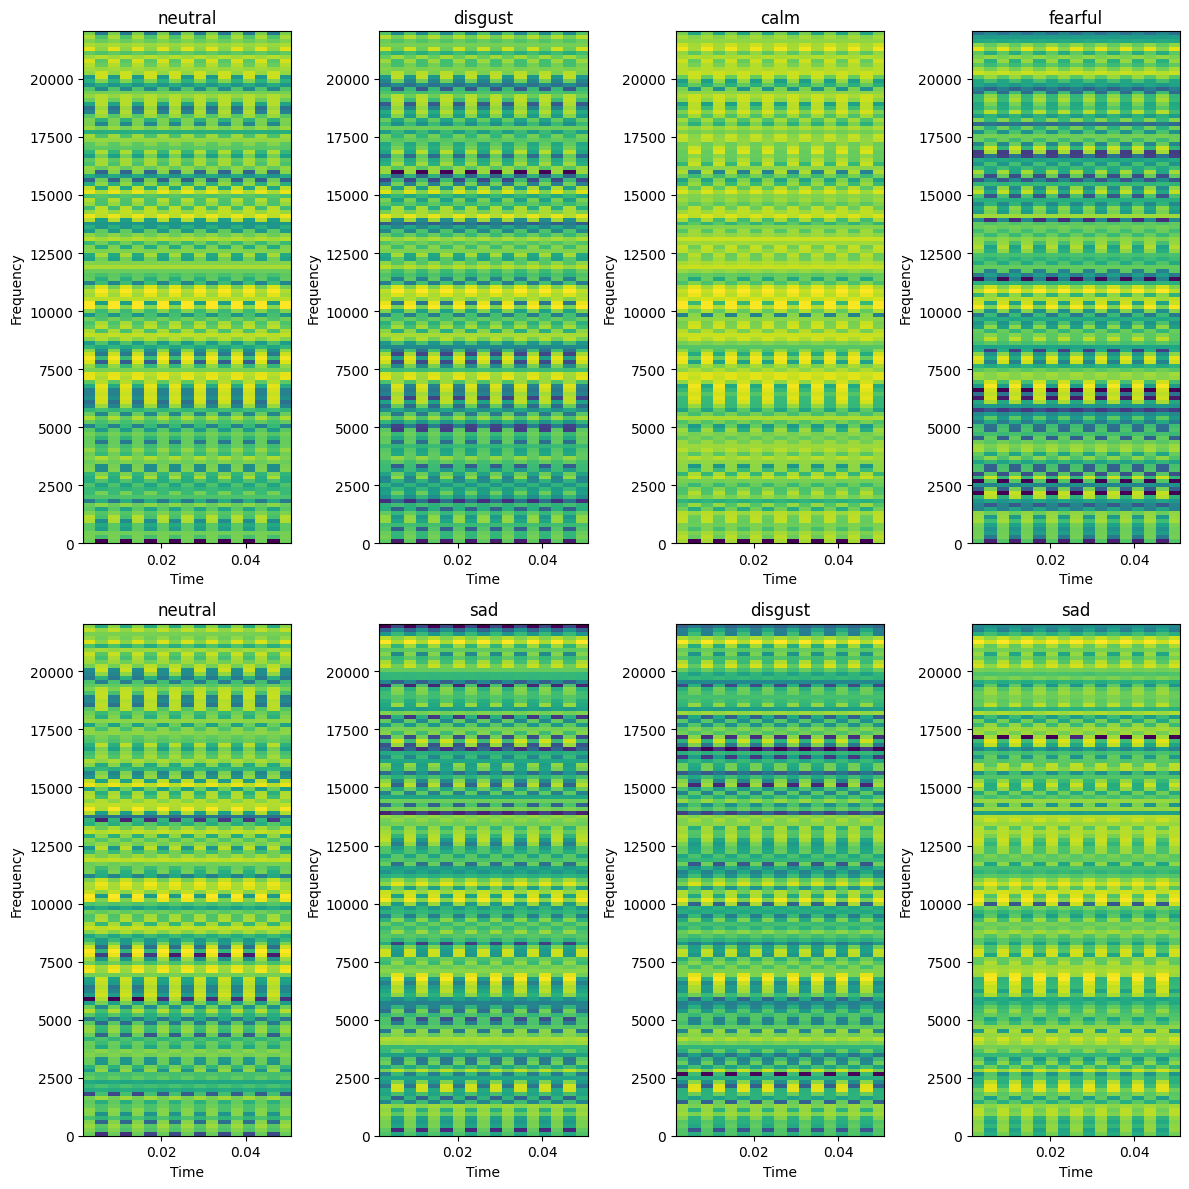

In [98]:
import matplotlib.pyplot as plt
import torch

# Assuming you have a list of 16 tensors
# Replace this with your actual list of tensors
tensor_list = atten_map[-1]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 12))

# Iterate through the tensors and plot them in subplots
for i, tensor_data in enumerate(tensor_list):
    # Convert the tensor to a numpy array
    data_array = tensor_data.cpu().detach().numpy()

    # Calculate the row and column indices for the subplot grid
    row_index = i // 4
    col_index = i % 4

    # Plot the spectrogram in the current subplot
    axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly
    axes[row_index, col_index].set_title(emotion_names[i])
    axes[row_index, col_index].set_xlabel('Time')
    axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From this above spectrogram plots, it can be seen that the model focussed uniformly on the 'fearful' attention map because of the uniform horizontal line brightness within the spectrogram.On the other hand for 'sad' and 'disgust' attention maps, it seems to be model focussed on higher frequency range i.e. on the non -speech regions

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

### Obtaining the Confusion Matrix on the Performance of Alexnet+Multihead model on validation Dataset

<AxesSubplot:title={'center':'Alexnet+Multihead_Atten by counts'}>

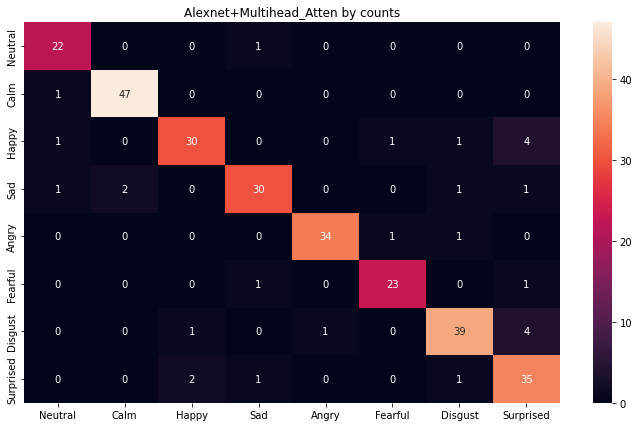

In [35]:
y_pred = []
y_true = []

for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = bestmodel(inputs)

      validation_output = torch.empty(0, 8, device=outputs.device)

      for i in range(len(outputs)):
        current_output = outputs[i][0]

        # Ensure that the current tensor is on the same device as final_output
        current_output = current_output.to(device=validation_output.device)

        # Add an extra dimension to current_output for concatenation
        current_output = current_output.unsqueeze(0)

        # Concatenate the current tensor to the final_output tensor along dimension 0
        validation_output = torch.cat((validation_output, current_output), dim=0)

      _, prediction = torch.max(validation_output,1)
      final_output = prediction.data.cpu().numpy()
      y_pred.extend(final_output) # Save Prediction

      labels = labels.data.cpu().numpy()
      y_true.extend(labels) # Save Truth


# constant for classes
classes = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry',
        'Fearful', 'Disgust', 'Surprised')

#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Alexnet+Multihead_Atten by counts')
sn.heatmap(df_cm, annot=True)

<AxesSubplot:title={'center':'Alexnet+Multihead_Atten , results in probability'}>

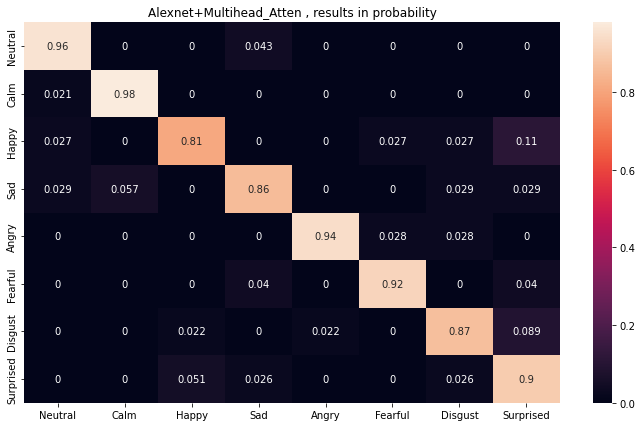

In [36]:
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Alexnet+Multihead_Atten , results in probability')
sn.heatmap(df_cm, annot=True)

From the confusion matrix output plot, that Alexnet+Multihead attention architecture confused with 'Happy' and 'Surprised' sppech, and therefore misclassified 11% of 'Happy' speech samples to 'Surprised'.It accurately classified 98% of samples to 'Calm', 94% of smaples to 'Angry'class.Compared to other models, this model successfully classify 96% samples to 'Neutral' Class Emotion.